<div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">
<h1>Machine Learning Lab 5: Logistic Regression </h1>
Name: Deshmukh Pratik Bhushanrao <br>
Roll No: 2448513
</div>

In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Inference:
    Importing necessary libraries

In [506]:
df = pd.read_csv("data\hospital_readmissions - hospital_readmissions.csv", index_col=None)
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


Inference: Loading data to a dataframe named df

In [507]:
df.readmitted = df.readmitted.apply(lambda x: 1 if x == 'yes' else 0)
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,0
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,0
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,1
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,1
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,0


Inference: Converting categorical target variable to the numerical variable

In [508]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,readmitted
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600,0.470160
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873,0.499119
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000,1.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000,1.000000


In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  int64

Inference: Getting information about our data

<Axes: xlabel='age', ylabel='readmitted'>

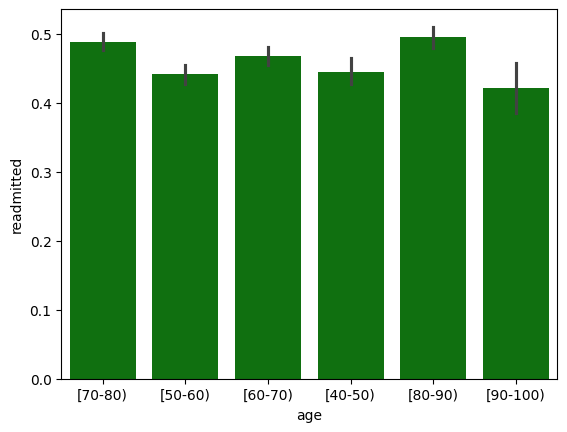

In [510]:
import seaborn as sns
sns.barplot(x= df["age"], y = df["readmitted"], color='green')

Inference: Finding the distribution of the ages in our data

In [511]:
def return_non_int_cols(df):
    '''
    This function returns the columns in the dataframe that are not of type int64
    '''
    return [col for col in df.columns if df[col].dtype != 'int64']

non_int_cols = return_non_int_cols(df)
non_int_cols

['age',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'glucose_test',
 'A1Ctest',
 'change',
 'diabetes_med']

Inference: Defining a function which returns the columns in the dataframe that are not of type int64.

In [512]:
unique_dict = dict()
for unique_col in non_int_cols:
    unique_dict[unique_col] = list(sorted(df[unique_col].unique()))
    
print(unique_dict)

{'age': ['[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'], 'medical_specialty': ['Cardiology', 'Emergency/Trauma', 'Family/GeneralPractice', 'InternalMedicine', 'Missing', 'Other', 'Surgery'], 'diag_1': ['Circulatory', 'Diabetes', 'Digestive', 'Injury', 'Missing', 'Musculoskeletal', 'Other', 'Respiratory'], 'diag_2': ['Circulatory', 'Diabetes', 'Digestive', 'Injury', 'Missing', 'Musculoskeletal', 'Other', 'Respiratory'], 'diag_3': ['Circulatory', 'Diabetes', 'Digestive', 'Injury', 'Missing', 'Musculoskeletal', 'Other', 'Respiratory'], 'glucose_test': ['high', 'no', 'normal'], 'A1Ctest': ['high', 'no', 'normal'], 'change': ['no', 'yes'], 'diabetes_med': ['no', 'yes']}


Inference: creating dictionary which contains names of all the categorical columns and their unique values 

In [513]:
ordinal_encoding = []
onehot_encoding = []

for key, value in unique_dict.items():
    if len(value)> 2:
        # print(key, value)
        ordinal_encoding.append(key)
    if len(value) <= 2:
        # print(key, value)
        onehot_encoding.append(key)

print(f"The columns for ordinal encoding are: {ordinal_encoding} \nThe columns for one hot encoding are: {onehot_encoding}")

The columns for ordinal encoding are: ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest'] 
The columns for one hot encoding are: ['change', 'diabetes_med']


Inference: Created 2 lists Ordinal_encoding and onehot_encoding for performing different encodings.

In [514]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
encoded_data_ordinal = ordinal_encoder.fit_transform(df[ordinal_encoding])

encoded_data_onehot = pd.get_dummies(df[onehot_encoding], dtype=int, drop_first=True)

df[ordinal_encoding] = encoded_data_ordinal
df[onehot_encoding] = encoded_data_onehot

Inference: Performing encoding on to the data

In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                25000 non-null  float64
 1   time_in_hospital   25000 non-null  int64  
 2   n_lab_procedures   25000 non-null  int64  
 3   n_procedures       25000 non-null  int64  
 4   n_medications      25000 non-null  int64  
 5   n_outpatient       25000 non-null  int64  
 6   n_inpatient        25000 non-null  int64  
 7   n_emergency        25000 non-null  int64  
 8   medical_specialty  25000 non-null  float64
 9   diag_1             25000 non-null  float64
 10  diag_2             25000 non-null  float64
 11  diag_3             25000 non-null  float64
 12  glucose_test       25000 non-null  float64
 13  A1Ctest            25000 non-null  float64
 14  change             25000 non-null  int32  
 15  diabetes_med       25000 non-null  int32  
 16  readmitted         250

In [516]:
from sklearn.preprocessing import StandardScaler

cols = list(df.columns)
cols.remove('readmitted')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('readmitted', axis=1))

Inference: Performing standardization on our data excluding 'readmitted' (target) column.

In [517]:
df_scaled_data = pd.DataFrame(scaled_data, columns=cols)
df_scaled_data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med
0,0.498538,1.181671,1.451151,-0.205440,0.216814,1.366510,-0.522918,-0.210644,0.379678,-1.165984,1.258116,1.006767,-0.000512,0.159989,-0.923181,0.547893
1,0.498538,-0.484212,-0.466276,0.377601,-0.403505,-0.306494,-0.522918,-0.210644,1.081225,0.955864,0.914882,1.006767,-0.000512,0.159989,-0.923181,0.547893
2,-1.021673,0.182141,0.088769,-0.788481,0.216814,-0.306494,-0.522918,-0.210644,0.379678,-1.165984,-1.144519,-1.108023,-0.000512,0.159989,1.083211,0.547893
3,0.498538,-0.817389,-0.365359,-0.788481,-0.527569,0.530008,-0.522918,-0.210644,0.379678,-1.165984,0.914882,-0.755558,-0.000512,0.159989,1.083211,0.547893
4,-0.261568,-1.150566,-0.062607,-0.788481,-1.147888,-0.306494,-0.522918,-0.210644,-0.321870,0.955864,-1.144519,1.359232,-0.000512,0.159989,-0.923181,0.547893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.258643,3.180732,1.703444,-0.205440,1.705579,-0.306494,-0.522918,-0.210644,0.379678,-1.165984,0.914882,-1.108023,-0.000512,2.672387,-0.923181,-1.825172
24996,1.258643,-0.817389,1.148400,-0.788481,0.961196,-0.306494,-0.522918,-0.210644,0.379678,-0.458701,-0.114818,1.006767,-0.000512,-2.352408,1.083211,0.547893
24997,0.498538,0.182141,-1.576365,-0.788481,-1.271951,-0.306494,0.326030,-0.210644,0.379678,0.955864,0.914882,1.006767,4.263503,0.159989,-0.923181,-1.825172
24998,0.498538,-0.817389,0.896107,0.960642,-0.155377,-0.306494,-0.522918,-0.210644,-1.023418,1.309505,-0.801286,1.006767,-0.000512,0.159989,1.083211,0.547893


Inference: Displaying processed data

<Axes: >

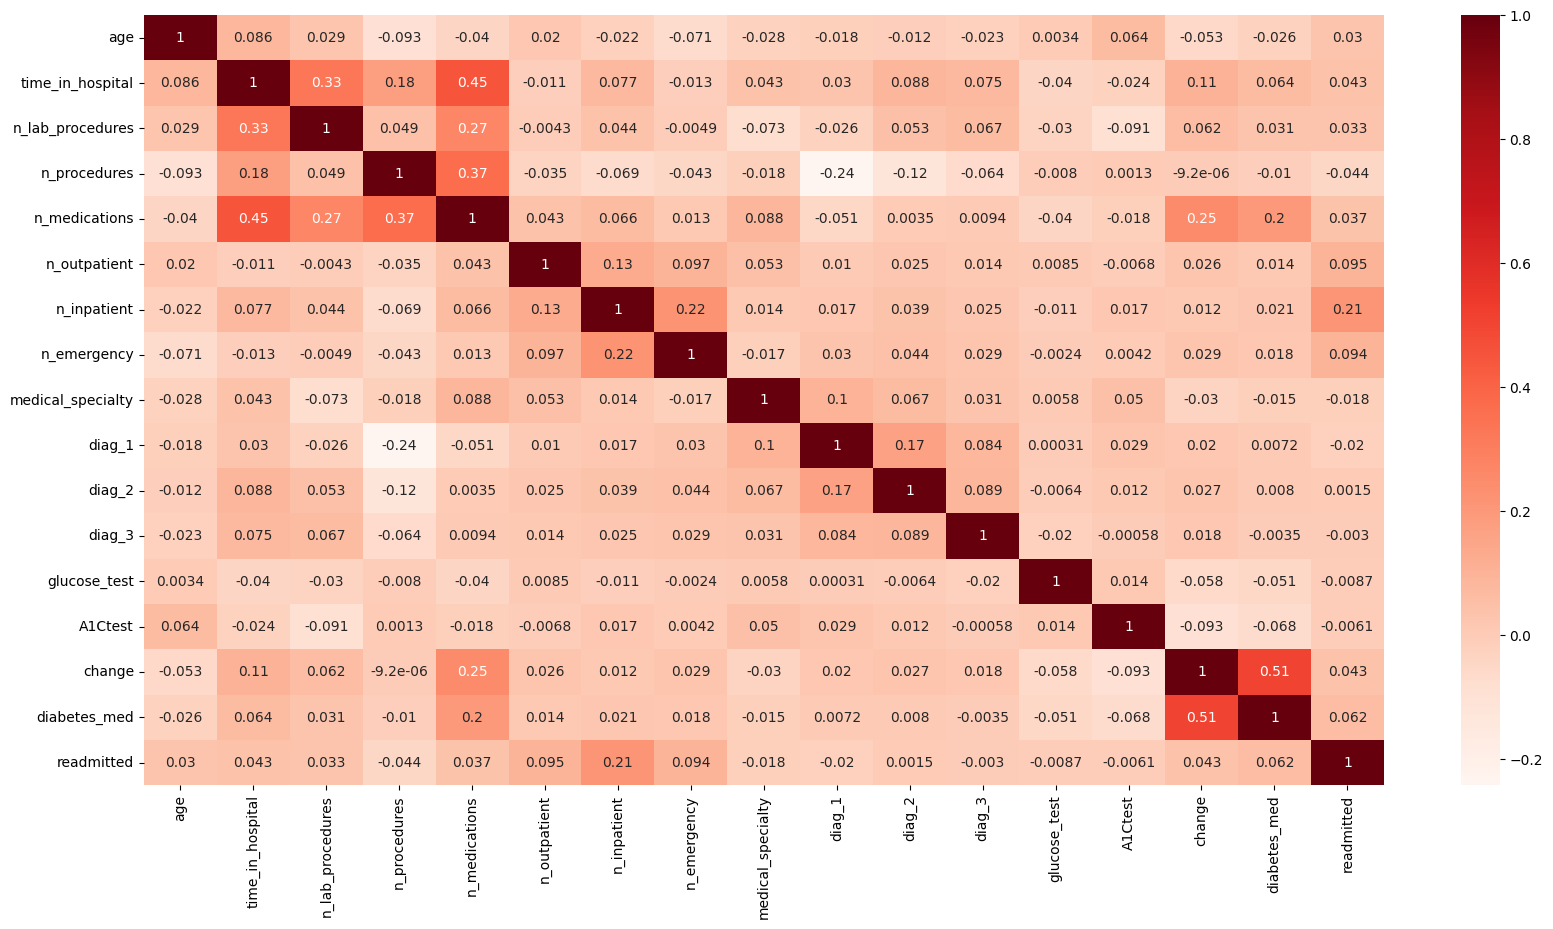

In [518]:
import seaborn as sns
import matplotlib.pyplot as plt

df_scaled_data['readmitted'] = df['readmitted']

plt.figure(figsize=(20,10))
sns.heatmap(df_scaled_data.corr(), annot=True, cmap='Reds')

# It looks like most of the features are are not related to the output variables

Inference: Plotting correlation plot for finding the relationship between our independant variables and our dependant variables 

In [519]:
list_of_truly_useful_cols_scaled= []

for col in df_scaled_data.corr().index:
    value = float(df_scaled_data.corr().iloc[-1][col])
    if value > 0.09:
        list_of_truly_useful_cols_scaled.append(col)

list_of_truly_useful_cols_scaled

df_truly_useful = df_scaled_data[list_of_truly_useful_cols_scaled]

df_truly_useful

,n_outpatient,n_inpatient,n_emergency,readmitted
0,1.366510,-0.522918,-0.210644,0
1,-0.306494,-0.522918,-0.210644,0
2,-0.306494,-0.522918,-0.210644,1
3,0.530008,-0.522918,-0.210644,1
4,-0.306494,-0.522918,-0.210644,0
...,...,...,...,...
24995,-0.306494,-0.522918,-0.210644,1
24996,-0.306494,-0.522918,-0.210644,1
24997,-0.306494,0.326030,-0.210644,1
24998,-0.306494,-0.522918,-0.210644,0


Inference: Extracted variable with at least 9% correlation with our target variable and stored them into the variable called 'list_of_truly_useful_cols_scaled'.

<Axes: >

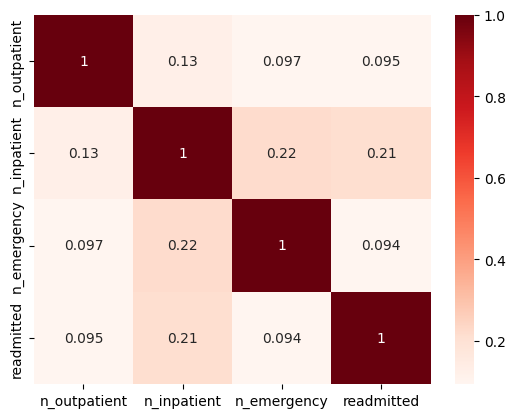

In [520]:
sns.heatmap(df_truly_useful.corr(), annot=True, cmap='Reds')

Inference: Displaying correlation plot amoung useful variable and our target variable

# Let's check if there is any multicollinearity in our dataset or not 

In [521]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_truly_useful.values, i) for i in range(df_truly_useful.shape[1])]
vif["features"] = df_truly_useful.columns
vif


,VIF Factor,features
0,1.024151,n_outpatient
1,1.084329,n_inpatient
2,1.057408,n_emergency
3,1.028195,readmitted


Inference: Using variance_inflation_factor to check multi-collinearity in our input variable

In [522]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_truly_useful.drop('readmitted', axis=1), df_truly_useful['readmitted'], stratify=df_truly_useful['readmitted'] , test_size=0.2, random_state=42)

Inference: Dividing our data into the training and testing data with 80 data as training data, stratify as our target variable and keeping random state as 42.

In [523]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Inference: Importing Logistic regression and fitting it with our data

In [524]:
print(f"The Trainging Accuracy is: {lr.score(X_train, y_train)} \nThe Testing Accuracy is: {lr.score(X_test, y_test)}")

The Trainging Accuracy is: 0.6013 
The Testing Accuracy is: 0.6038


Inference: Displaying training accuracy and testing accuracy of our model

In [525]:
y_pred = lr.predict(X_test)
print(f"Predictions: {y_pred}")

Predictions: [0 0 1 ... 1 0 0]


Inference: Displaying predictions that our model made 

In [526]:
from sklearn.metrics import confusion_matrix, classification_report

# Classification Reprot which displays precision, recall, f1-score for both classes
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.86      0.70      2649
           1       0.66      0.32      0.43      2351

    accuracy                           0.60      5000
   macro avg       0.62      0.59      0.56      5000
weighted avg       0.62      0.60      0.57      5000



Inference: displaying classification Reprot which displays precision, recall, f1-score for both classes

<Axes: >

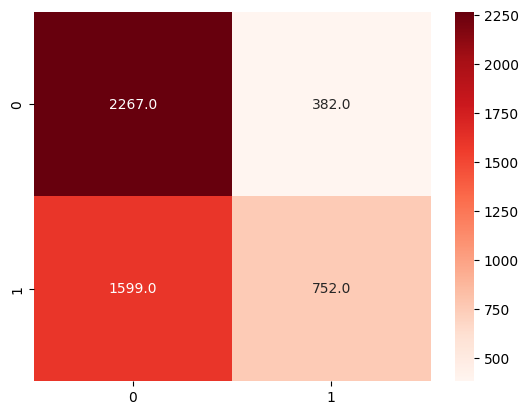

In [527]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f', cmap='Reds')

Inference: Plotting Confusion Matrix

<h1> Visualization</h1>

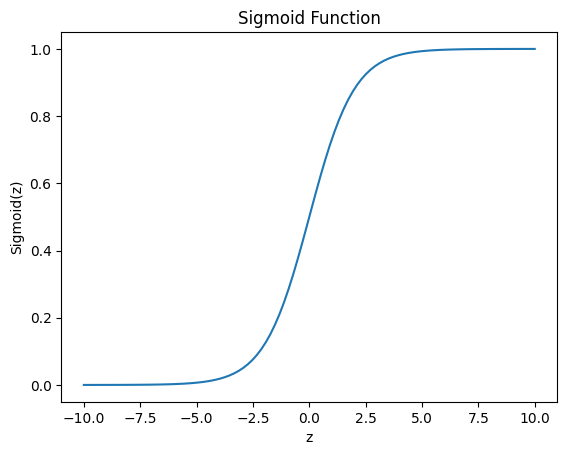

In [528]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.title('Sigmoid Function')
plt.show()


Inference: Displayed sigmoid curve by using numpy and matplotlib

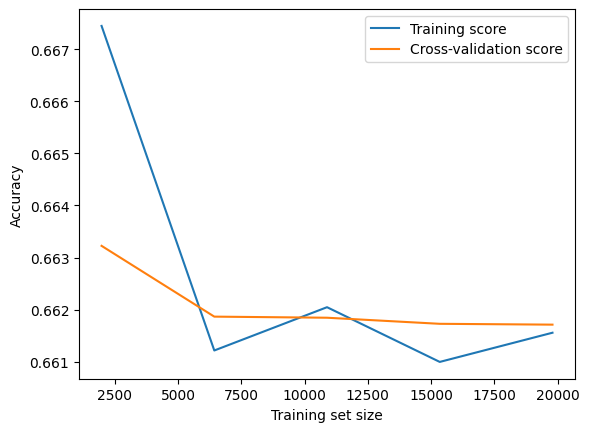

In [529]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, cv=100, n_jobs=1, scoring="neg_log_loss")

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Inference: Plotting loss functino using "learning_curve" a built in method

## ROC

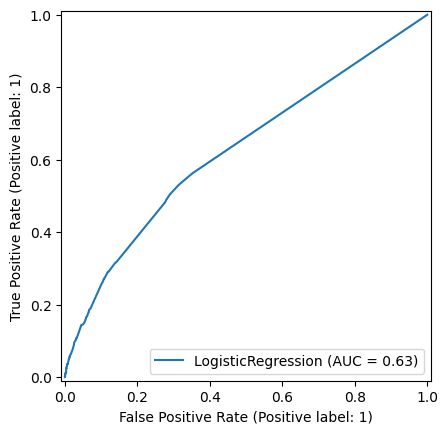

In [530]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr, X_test, y_test)

Inference: Plotting ROC curve using 'RocCurveDisplay' with value of AUC (Area under the curve)

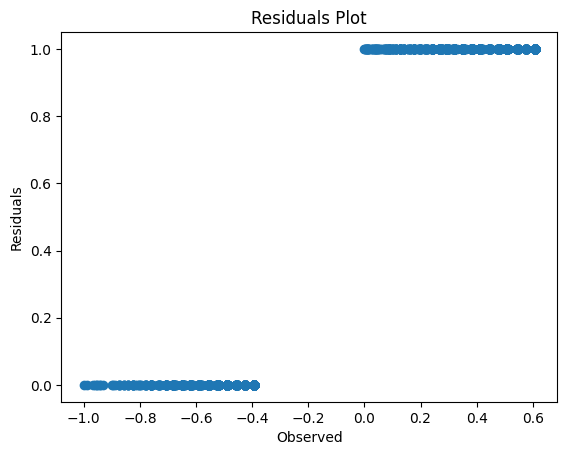

In [531]:
residuals = y_test - lr.predict_proba(X_test)[:, 1]
plt.scatter(residuals, y_test)
plt.xlabel('Observed')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


Inference: Displaying residuals with the graphs

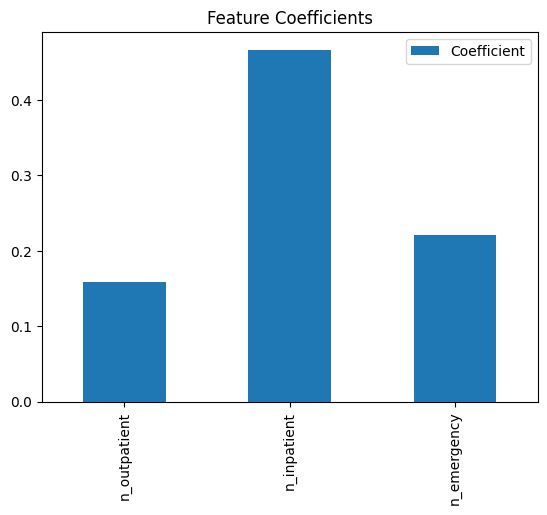

In [535]:
coefficients = pd.DataFrame(lr.coef_.flatten(), X_train.columns, columns=['Coefficient'])
# print(coefficients)

coefficients.plot(kind='bar')
plt.title('Feature Coefficients')
plt.show()

Inference: Finding the values of the coffeicients of our model

# Summery:

As the most of our data is categorical first we make it numerical. After making it numeric we standardize our data for further analysis. After that we check the relation independant variables with our target variable. We found that most of the independant variables are not related to our target variable. So, we discard them and use only 3 features for our model building. After discarding the useless features we check for multi-collinearity and found that there's no multi-collinearity in our features. when we build our linear regression model we encounter the problem of poor performance. This problem is occured because our features are not related to our output variables.  Then we plotted loss function. Then we plotted ROC and AUC for findind true positive rate and at last we plotted residuals. We finished our analysis by displaying our coefficients and bias. 

# -------------------EOD------------------